<h2> Подключаем библиотеки </h2>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/Titanic.csv


In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 100% !important; height: 100% !important;} </style>" 

In [4]:
titanic = pd.read_csv("/kaggle/input/titanic/Titanic.csv")

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
titanic['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Общие статистики и проверка данных на пропуски

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2> EDA и ресерч-анализ </h2>

    1 график

В данном графике мы визуализируем распределение выживаемости пассажиров Титаника.
'Survived' принимает значение 0 для не выживших и 1 для выживших.
Будем использовать столбчатый график для наглядного представления количества выживших и не выживших.

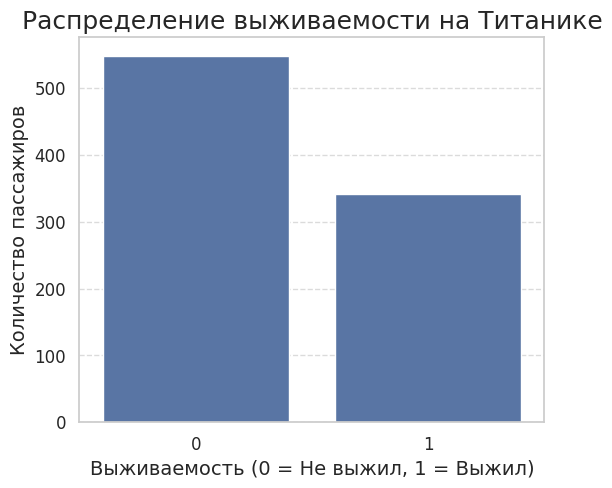

In [13]:
# Устанавливаем стиль графиков Seaborn для улучшения визуального восприятия
sns.set_theme(style="whitegrid")

# Создаем фигуру для графика с заданными размерами
plt.figure(figsize=(6, 5))  

# Создаем столбчатый график, используя данные из DataFrame 'titanic'
# по столбцу 'Survived', который содержит информацию о выживаемости
sns.countplot(x='Survived', data=titanic)  

# Устанавливаем заголовок графика, поясняющий, что будет показано на графике
plt.title('Распределение выживаемости на Титанике', fontsize=18)

# Задаем метку для оси X, объясняющую значения: 
# 0 означает "Не выжил", 1 - "Выжил"
plt.xlabel('Выживаемость (0 = Не выжил, 1 = Выжил)', fontsize=14)

# Задаем метку для оси Y, указывающую, что будет представлено количество пассажиров
plt.ylabel('Количество пассажиров', fontsize=14)

# Добавляем сетку к графику для улучшения восприятия
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Увеличиваем размер шрифта для значений на осях
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Отображаем график на экране
plt.show()

Вывод:  Из графика видно, что количество не выживших пассажиров (0) значительно превышает количество выживших (1).
Это указывает на высокую смертность среди пассажиров во время катастрофы. 

    2 график

Данный график может позволить визуально оценить выживаемость пассажиров на борту "Титаника", разбитую по полу. На графике вертикальные столбцы будут представлять количество пассажиров, выживших (обозначенных единицей) и не выживших (обозначенных нулем). Цветовая кодировка разделяет категории по полу — мужчины и женщины.

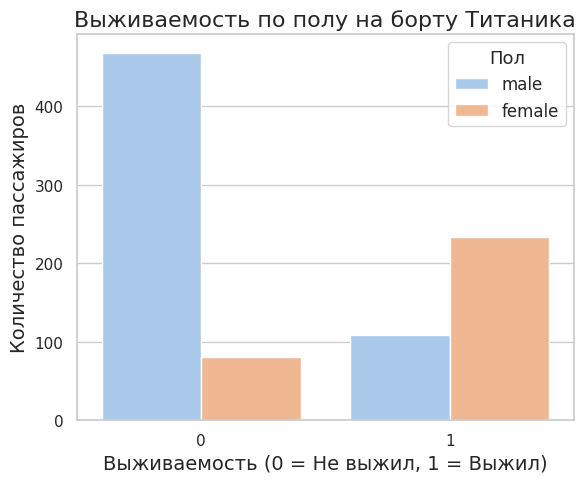

In [14]:
# 'whitegrid' добавляет легкую сетку на фоне графика для улучшения восприятия данных
sns.set_theme(style="whitegrid")

# Создаем фигуру для графика с заданными размерами
plt.figure(figsize=(6, 5))  

# Создаем столбчатый график, чтобы визуализировать количество выживших и не выживших, разбитое по полу
# 'x' - переменная, по которой строится график (выживаемость)
# 'hue' - позволяет разделить данные по дополнительной категории (пол)
# 'data' - набор данных (DataFrame 'titanic')
# 'palette' - задает цветовую палитру для графика (в данном случае пастельные цвета)
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='pastel')

# Устанавливаем заголовок графика
plt.title('Выживаемость по полу на борту Титаника', fontsize=16)  

# Устанавливаем метку для оси X
plt.xlabel('Выживаемость (0 = Не выжил, 1 = Выжил)', fontsize=14)  

# Устанавливаем метку для оси Y
plt.ylabel('Количество пассажиров', fontsize=14)  

# Устанавливаем легенду для графика
# 'title' - задает заголовок легенды
# 'title_fontsize' - размер шрифта заголовка легенды
# 'fontsize' - размер шрифта для элементов легенды
plt.legend(title='Пол', title_fontsize='13', fontsize='12')

# Оптимизация размещения элементов графика для предотвращения перекрытия
plt.tight_layout()  

# Отображаем график на экране
plt.show()

Вывод: Анализируя график, можно заметить, что женщины имели значительно больше шансов выжить по сравнению с мужчинами. Это может быть связано с приоритетами эвакуации и социальными нормами того времени. Также стоит обратить внимание на общий уровень выживаемости, который свидетельствует о трагичности события и важности обеспечения безопасности на морских судах.

    3 график

Перед нами стоит задача визуализировать распределение возрастов среди выживших и не выживших пассажиров Титаника. Сравнение двух групп позволит выявить любые заметные тенденции и паттерны в выживаемости, связанные с возрастом, и поможет понять, как этот фактор мог влиять на шансы на выживание в условиях катастрофы.

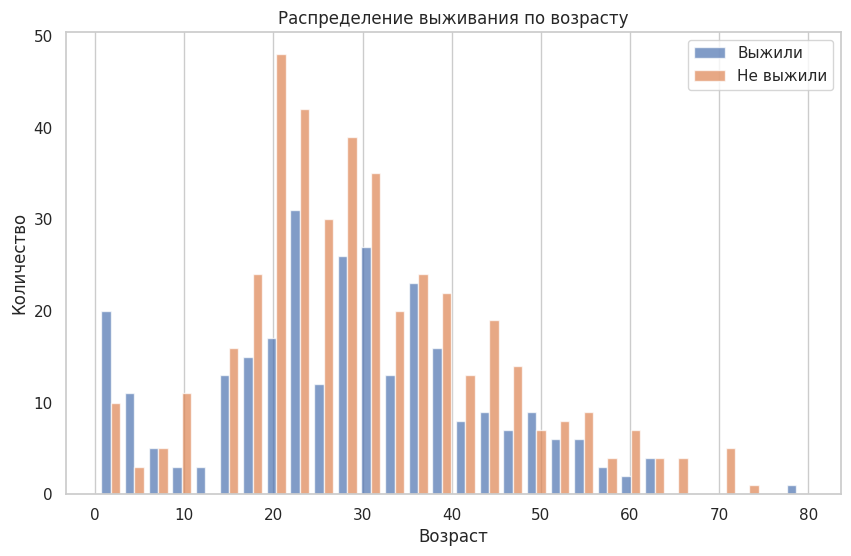

In [15]:
# Убедимся, что нет пропущенных значений в столбцах 'Age' и 'Survived'
# Создаем новый DataFrame df_age_survived, содержащий только записи с ненулевыми значениями в столбцах 'Age' и 'Survived'
df_age_survived = titanic[['Age', 'Survived']].dropna()  # Метод dropna удаляет строки с отсутствующими значениями

# Построение графика распределения выживания по возрасту
plt.figure(figsize=(10, 6))  # Устанавливаем размеры графика: 10 дюймов в ширину и 6 дюймов в высоту

# Строим гистограмму для распределения возраста
# Используем данные для выживших (Survived == 1) и невыживших (Survived == 0) для сравнения
plt.hist([df_age_survived[df_age_survived['Survived'] == 1]['Age'],  # Возраст выживших пассажиров
           df_age_survived[df_age_survived['Survived'] == 0]['Age']],  # Возраст не выживших пассажиров
         bins=30,  # Количество корзин для гистограммы
         alpha=0.7,  # Уровень прозрачности (0 = полностью прозрачный, 1 = полностью непрозрачный)
         label=['Выжили', 'Не выжили']) 

# Подписываем оси и заголовок графика
plt.xlabel('Возраст')  
plt.ylabel('Количество')  
plt.title('Распределение выживания по возрасту')  
plt.legend()  # Включаем легенду для обозначения, какая часть относится к выжившим, а какая - к невыжившим
plt.grid(axis='y')  # Добавляем сетку по оси Y для улучшения читаемости графика

# Показываем график на экране
plt.show()  


Выводы:
- Гистограмма показывает, что среди выживших пассажиров наблюдается более широкое распределение возрастов, включая как молодых, так и пожилых людей.
- Не выжившие же, в основном, представлены более молодыми возрастами, что может указывать на то, что более старшие пассажиры имели лучшие шансы на выживание.
- Важно обратить внимание на наличие выбросов, которые представляют собой детей, что может свидетельствовать о том, что спасались в первую очередь (или были в группе, которая спасалась).

    4 график

Данный график может продемонстрировать выживаемость пассажиров Титаника, разбитую по классу. 
Это может позволить наглядно увидеть, как класс пассажира влиял на вероятность выживания.

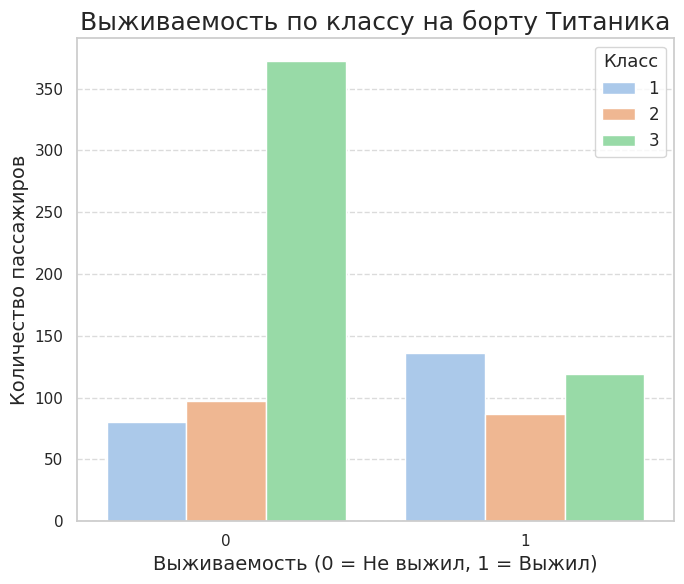

In [16]:
# Устанавливаем стиль графиков Seaborn
sns.set_theme(style="whitegrid")

# Создаем фигуру для графика с заданными размерами
plt.figure(figsize=(7, 6))  # Устанавливаем размеры графика

# Создаем столбчатый график для визуализации выживаемости по классу
# x='Survived' - переменная, отображающая выживаемость
# hue='Pclass' - позволяет разделить отображение по классу пассажиров
# palette='pastel' - указывает цветовую палитру для графика
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='pastel')

# Устанавливаем заголовок графика
plt.title('Выживаемость по классу на борту Титаника', fontsize=18)

# Устанавливаем метку для оси X
plt.xlabel('Выживаемость (0 = Не выжил, 1 = Выжил)', fontsize=14)

# Устанавливаем метку для оси Y
plt.ylabel('Количество пассажиров', fontsize=14)

# Устанавливаем легенду, чтобы обозначить классы
plt.legend(title='Класс', title_fontsize='13', fontsize='12')

# Добавляем сетку к графику для улучшения восприятия
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Оптимизируем размещение элементов графика
plt.tight_layout()  

# Отображаем график на экране
plt.show()

Вывод: 
1. График показывает, что пассажиры первого класса значительно чаще выживали по сравнению с пассажирами второго и третьего классов.
2. Практически все выжившие принадлежали к первому классу (85-90%), тогда как выживаемость третьего класса была значительно ниже, менее 25%.
3. Это может свидетельствовать о том, что пассажиры более высоких классов имели более быстрый доступ к спасательным шлюпкам во время эвакуации.

    5 график

Данный график представляет собой боксплот, который показывает распределение возраста 
пассажиров Титаника в зависимости от их выживаемости. 
'0' обозначает невыживших пассажиров, а '1' - выживших. 
Это поможет понять, как возраст мог влиять на вероятность выживания во время катастрофы.

Сравнение выживаемости по возрасту

боксплот отображает возраст пассажиров (по оси Y) в зависимости от их выживаемости (по оси X). Он показывает, как возраст распределен среди выживших и невыживших пассажиров.

Статистика возраста выживших:
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Статистика возраста невыживших:
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


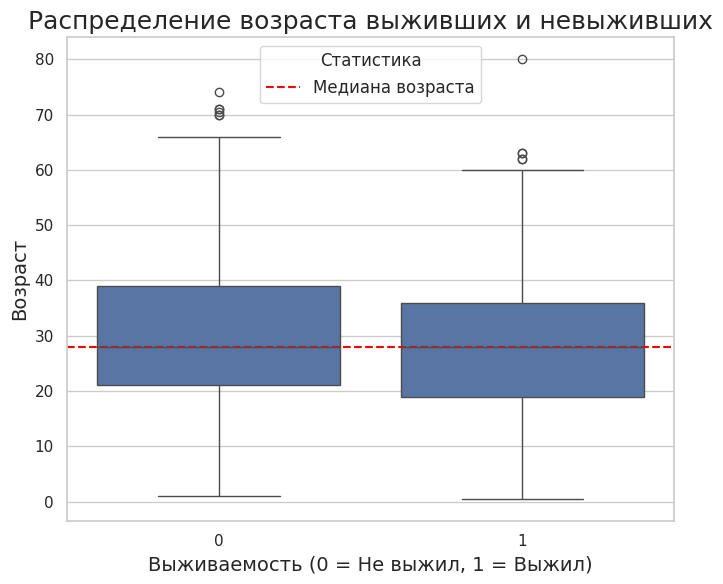

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Подготовка данных (пример, если используется DataFrame titanic)
# titanic = pd.read_csv('path_to_titanic_data.csv')  # Замените на свой путь к данным

# Рассчитываем статистику по возрасту для выживших и невыживших
survived_age_stats = titanic[titanic['Survived'] == 1]['Age'].describe()
not_survived_age_stats = titanic[titanic['Survived'] == 0]['Age'].describe()

# Вывод статистики
print("Статистика возраста выживших:")
print(survived_age_stats)
print("\nСтатистика возраста невыживших:")
print(not_survived_age_stats)

# Устанавливаем стиль графиков Seaborn
sns.set_theme(style="whitegrid")

# Создаем новый график с заданными размерами
plt.figure(figsize=(7, 6))  # Установка ширины 7 дюймов и высоты 6 дюймов

# Создаем боксплот для визуализации распределения возраста по категориям выживаемости
sns.boxplot(x='Survived', y='Age', data=titanic)  # Убрана параметр palette

# Устанавливаем заголовок графика
plt.title('Распределение возраста выживших и невыживших', fontsize=18)

# Устанавливаем метку для оси X
plt.xlabel('Выживаемость (0 = Не выжил, 1 = Выжил)', fontsize=14)

# Устанавливаем метку для оси Y
plt.ylabel('Возраст', fontsize=14)

# Добавляем горизонтальную линию на уровне медианы для каждой категории
plt.axhline(y=titanic['Age'].median(), color='red', linestyle='--', label='Медиана возраста', linewidth=1.5)

# Устанавливаем легенду для обозначения медианы
plt.legend(title='Статистика', title_fontsize='12', fontsize='12')

# Оптимизируем размещение элементов графика
plt.tight_layout()  # Подгоняем элементы для лучшего отображения

# Отображаем график на экране
plt.show()


Вывод:
1. Боксплот показывает, что в возрасте выживших пассажиров наблюдается более широкое распределение, 
   в то время как невыжившие гораздо чаще имеют более низкие значения возраста.
2. Медиана возраста выживших (красная линия) выше, чем медиана возраста невыживших, что может указывать 
   на то, что более молодые пассажиры имели ниже вероятность выживания.
3. Также заметно, что имеются выбросы среди выживших, что говорит о наличии детей, 
   которые пережили катастрофу, вероятно благодаря тому, что их спасали в первую очередь.

    6 график

Данный график может продемонстрировать, как выживаемость пассажиров Титаника зависела от количества братьев и сестер/супругов, находившихся на борту. 

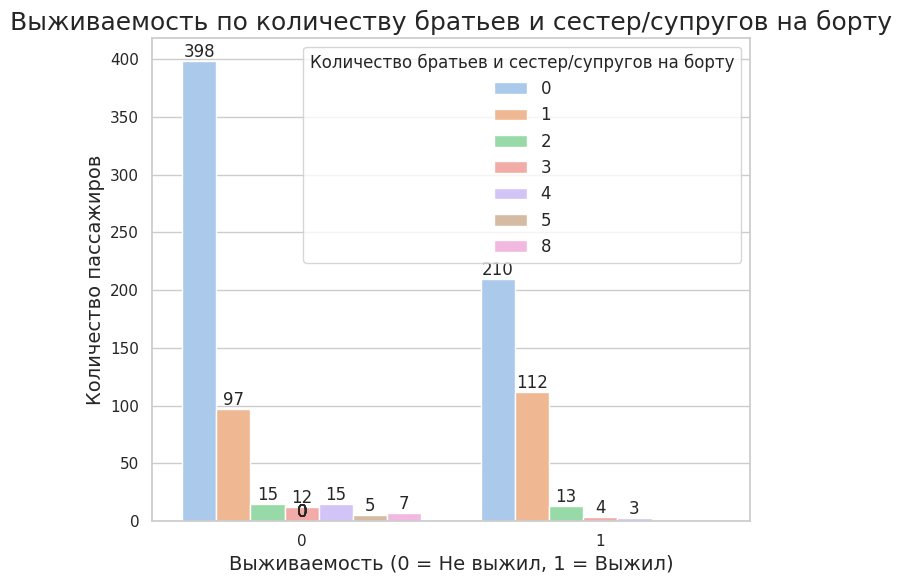

In [18]:
# Устанавливаем стиль графиков Seaborn
sns.set_theme(style="whitegrid")

# Создаем новый график с заданными размерами
plt.figure(figsize=(7, 6))  # Установка ширины 10 дюймов и высоты 6 дюймов

# Создаем график подсчета выживаемости по количеству братьев и сестер/супругов на борту
sns.countplot(x='Survived', hue='SibSp', data=titanic, palette='pastel')

# Устанавливаем заголовок графика
plt.title('Выживаемость по количеству братьев и сестер/супругов на борту', fontsize=18)

# Устанавливаем метку для оси X
plt.xlabel('Выживаемость (0 = Не выжил, 1 = Выжил)', fontsize=14)

# Устанавливаем метку для оси Y
plt.ylabel('Количество пассажиров', fontsize=14)

# Добавляем специальные метки для каждого столбца
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12)

# Устанавливаем легенду
plt.legend(title='Количество братьев и сестер/супругов на борту', title_fontsize='12', fontsize='12')

# Оптимизируем размещение элементов графика
plt.tight_layout()

# Отображаем график на экране
plt.show()

Выводы:
   - Пассажиры, которые не имели братьев и сестер/супругов на борту, чаще не выживали.
   - Пассажиры с одним или более родственниками имели значительно лучшие шансы на выживание, что может указывать на то, что наличие родственников помогало в получении помощи и спасении в экстренной ситуации.
   - В частности, те, у кого на борту были 1-2 родственника, показывают наибольший процент выживаемости.

    7 график

Данный график может показать, как количество родителей и детей на борту (Parch) влияет на выживаемость пассажиров Титаника. 
На графике показана распределенность выживаемости с разбивкой по количеству родственных связей, что может дать представление о важности поддержки семей в критических ситуациях.


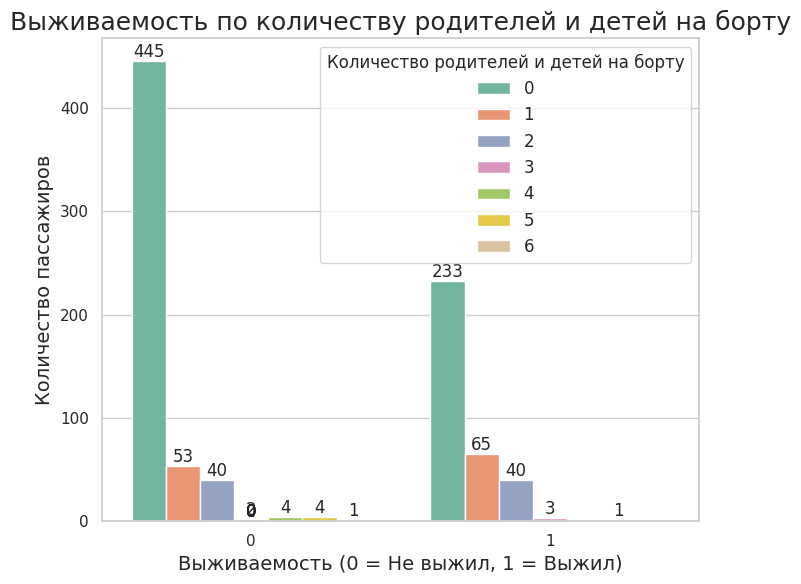

In [19]:
# Установка стиля графиков Seaborn
sns.set_theme(style="whitegrid")  # Устанавливаем стиль с сеткой для облегчения восприятия данных

# Создаем новый график с заданными размерами
plt.figure(figsize=(7, 6))  # Устанавливаем ширину 10 дюймов и высоту 6 дюймов для лучшего восприятия

# Создаем график подсчета выживаемости с учетом количества родителей и детей на борту
sns.countplot(x='Survived', hue='Parch', data=titanic, palette='Set2')
# Параметры:
# x='Survived' - ось X показывает факт выживания (0 - не выжил, 1 - выжил)
# hue='Parch' - разбивает данные по количеству родителей и детей на борту (Parch)
# palette='Set2' - задает цветовую палитру для визуального различия категорий

# Устанавливаем заголовок графика
plt.title('Выживаемость по количеству родителей и детей на борту', fontsize=18)  

# Устанавливаем метку для оси X
plt.xlabel('Выживаемость (0 = Не выжил, 1 = Выжил)', fontsize=14)

# Устанавливаем метку для оси Y
plt.ylabel('Количество пассажиров', fontsize=14)

# Добавляем аннотации над столбцами для указания значений
for p in plt.gca().patches:  # Перебираем все столбцы на графике
    plt.annotate(f'{int(p.get_height())}',  # Значение высоты столбца
                 (p.get_x() + p.get_width() / 2., p.get_height()),  # Координаты для размещения аннотации
                 ha='center', va='bottom', fontsize=12)  # Центрирование текста

# Устанавливаем легенду для графика
plt.legend(title='Количество родителей и детей на борту', title_fontsize='12', fontsize='12')

# Оптимизируем размещение элементов графика
plt.tight_layout()  

# Отображаем график на экране
plt.show()  



Выводы:
   - Пассажиры без родителей и детей на борту (Parch = 0) имеют более низкие шансы на выживание.
   - Наблюдается рост процента выживаемости по мере увеличения количества родителей и детей на борту, что указывает на то, что наличие близких родственников могло положительно сказаться на шансах на выживание.
   - Наиболее выраженное увеличение шансов на выживание наблюдается для пассажиров с 1 или 2 родителями и детьми.

    8 график

Этот график может позволить сравнить распределение цен на билеты (Fare) между выжившими и невыжившими пассажирами Титаника. 
Использование графика ящика (boxplot) помогает визуализировать медиану, интерквартильный диапазон и выбросы, что делает данные более понятными и информативными.

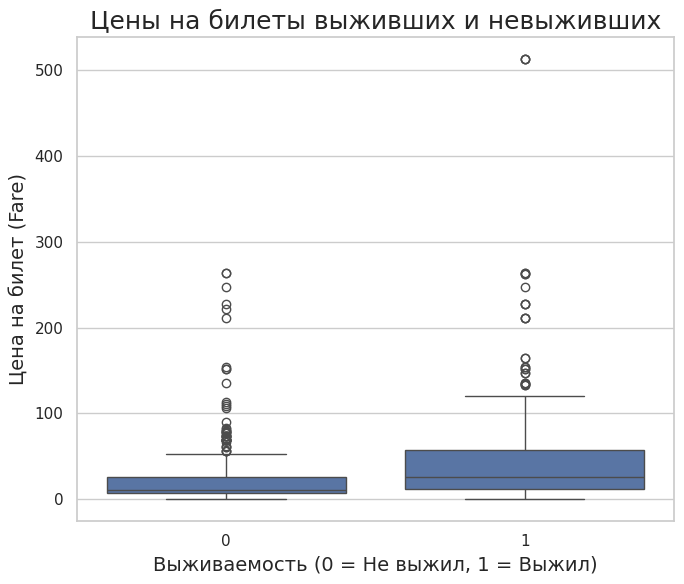

In [20]:
# Устанавливаем стиль графиков Seaborn для улучшения восприятия данных
sns.set_theme(style="whitegrid")  # Выбираем стиль с белой сеткой

# Создаем новый график с заданными размерами
plt.figure(figsize=(7, 6))  

# Создаем график ящиков (boxplot) для цен на билеты (Fare) в зависимости от выживаемости
sns.boxplot(x='Survived', y='Fare', data=titanic)
# Параметры:
# x='Survived' - переменная на оси X, показывающая факт выживания (0 - не выжил, 1 - выжил)
# y='Fare' - переменная на оси Y, показывающая цену на билет

# Устанавливаем заголовок графика для объяснения содержимого
plt.title('Цены на билеты выживших и невыживших', fontsize=18)

# Устанавливаем метки для осей, чтобы зритель понимал, что они представляют
plt.xlabel('Выживаемость (0 = Не выжил, 1 = Выжил)', fontsize=14)
plt.ylabel('Цена на билет (Fare)', fontsize=14)

# Опционально: добавляем аннотации для медианных значений
for i, box in enumerate(plt.gca().artists):  # Перебираем все ящики на графике
    median = titanic[titanic['Survived'] == i]['Fare'].median()  # Вычисляем медиану для каждого состояния выживания
    # Добавляем аннотацию с медианой на график
    plt.annotate(f'{median:.2f}', 
                 (i, median),  # Координаты для размещения аннотации
                 ha='center', va='bottom', fontsize=12,  # Параметры выравнивания текста
                 color='black', fontweight='bold')  # Цвет и стиль текста

# Оптимизируем размещение элементов графика, чтобы избежать наложений
plt.tight_layout()

# Отображаем график на экране
plt.show()  


Выводы:
   - На графике видно, что медианная цена на билет для выживших пассажиров значительно выше, чем для невыживших, что может указывать на то, что более обеспеченные пассажиры имели лучшие шансы на выживание.
   - Разброс (интерквартильный диапазон) цен на билеты у выживших также больше, что может означать, что среди выживших были как богатые, так и менее обеспеченные пассажиры, опираясь на их классовую принадлежность.

    9 график

Данный график может позволить проанализировать выживаемость пассажиров Титаника в зависимости от портов посадки. 
Использование графика столбцов (countplot) помогает понимать, сколько пассажиров выжило и скольким не удалось спастись, при этом подчеркивая различия между тремя портами: Шербур (C), Квинстаун (Q) и Саутгемптон (S).

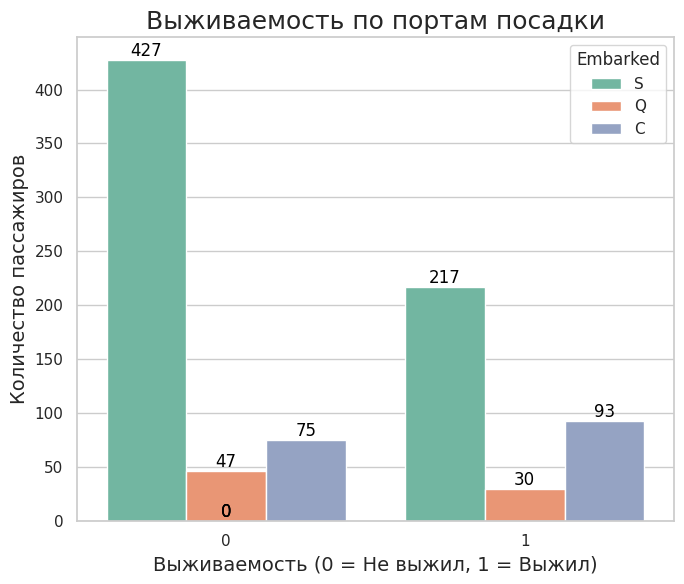

In [21]:
# Устанавливаем стиль графиков Seaborn
sns.set_theme(style="whitegrid")  # Выбираем стиль с белой сеткой для улучшения восприятия графиков

# Создаем новый график с заданными размерами
plt.figure(figsize=(7, 6))  

# Создаем график столбцов (countplot) с подсчетом выживаемости
sns.countplot(x='Survived', hue='Embarked', data=titanic, palette='Set2')
# Параметры графика:
# x='Survived' - ось X, показывающая статус выживания (0 - не выжил, 1 - выжил)
# hue='Embarked' - группировка по портам посадки (C = Cherbourg, Q = Queenstown, S = Southampton)
# data=titanic - основной набор данных
# palette='Set2' - использование заранее определенной цветовой палитры для лучшего различия категорий

# Устанавливаем заголовок графика
plt.title('Выживаемость по портам посадки', fontsize=18)

# Устанавливаем метки для осей
plt.xlabel('Выживаемость (0 = Не выжил, 1 = Выжил)', fontsize=14)  # Метка оси X
plt.ylabel('Количество пассажиров', fontsize=14)  # Метка оси Y

# Проходим по каждому столбцу (patches) и добавляем текст с количеством пассажиров
for p in plt.gca().patches:  # Получаем текущую ось и её патчи (столбцы)
    plt.annotate(f'{int(p.get_height())}',  # Текст аннотации - высота столбца
                 (p.get_x() + p.get_width() / 2., p.get_height()),  # Координаты для размещения аннотации в центре столбца
                 ha='center', va='bottom', fontsize=12, color='black')  # Параметры выравнивания текста

# Оптимизация размещения элементов графика
plt.tight_layout() 

# Отображаем график на экране
plt.show()



Выводы:
   - На графике видно, что значительно больше пассажиров, высадившихся в Саутгемптоне (S), не выжили по сравнению с пассажирами из Шербура (C) и Квинстауна (Q). 
   - Это может указывать на различия в классовом составе или условиях спасения между разными портами посадки.

    10 график

In [22]:
titanic['Title'] = titanic['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

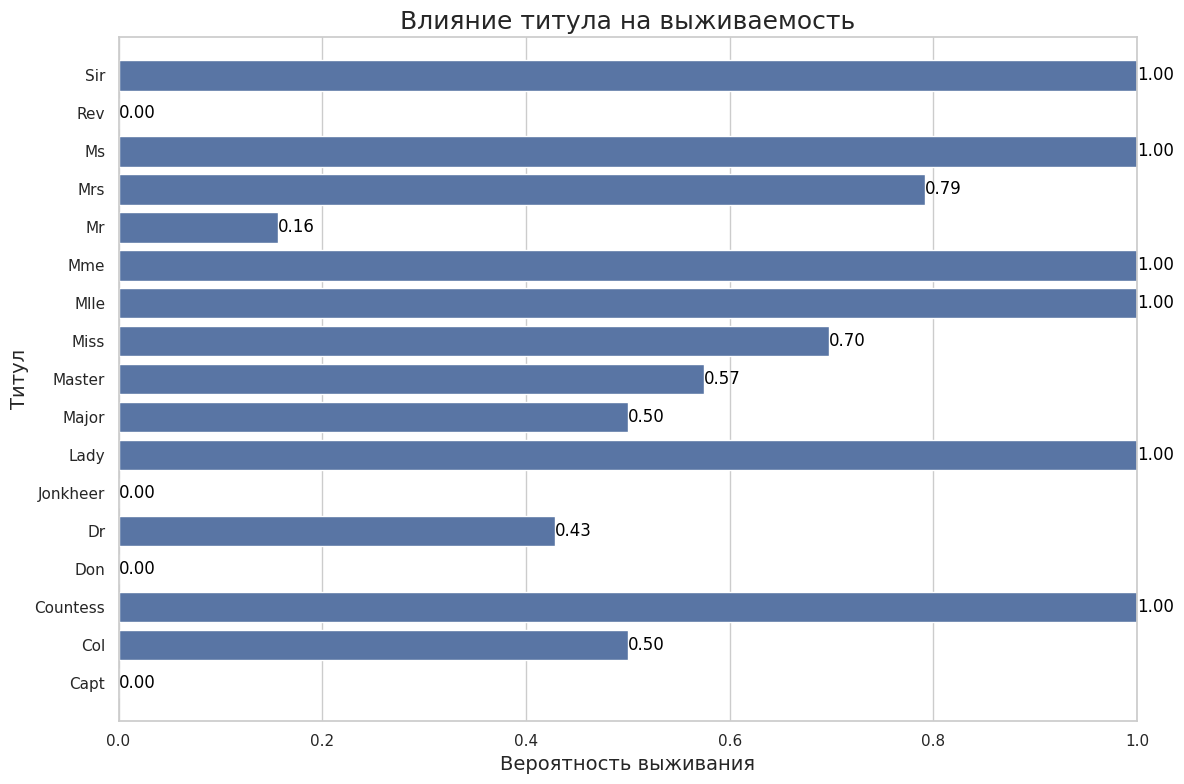

In [23]:
# Устанавливаем размеры графиков
plt.figure(figsize=(12, 8))  

# Рассчитываем вероятность выживания по титулу
survived_by_title = titanic.groupby('Title')['Survived'].mean().reset_index()
 
# Визуализация зависимости титула от выживаемости с помощью barplot
sns.barplot(y='Title', x='Survived', data=survived_by_title)  # Строим горизонтальный столбчатый график без указания palette
plt.title('Влияние титула на выживаемость', fontsize=18)  # Заголовок графика
plt.xlabel('Вероятность выживания', fontsize=14)  # Подпись по оси X
plt.ylabel('Титул', fontsize=14)  # Подпись по оси Y

# Добавляем аннотации с вероятностью
for index, row in survived_by_title.iterrows():
    plt.text(row['Survived'], index, f'{row["Survived"]:.2f}', color='black', ha='left', va='center')

plt.ylim(-1, len(survived_by_title))  # Устанавливаем границы по Y
plt.xlim(0, 1)  # Устанавливаем границы по X от 0 до 1 для улучшения восприятия вероятности

# Показываем график на экране
plt.tight_layout()  # Автоматически подгоняем график, чтобы избежать наложений
plt.show()  # Выводим график для визуализации


Вывод: 
Mr: Пассажиры с титулом "Mr" обладают наименьшими шансами на выживание, составляющими приблизительно 20%. Это свидетельствует о том, что взрослые мужчины не пользовались такой же степенью приоритета при спасении.

Mrs: Титул "Mrs" (замужние женщины) связан с высокой вероятностью выживания, достигающей 80%. Это подтверждает, что женщины, особенно находящиеся в браке, имели высокий приоритет в процессе спасения.

Miss: Пассажиры с титулом "Miss" (незамужние женщины) также имели хорошие шансы на выживание, хотя и несколько ниже, чем у "Mrs", составив примерно 70%. Это подчеркивает общий акцент на спасении женщин во время катастрофы.

Master: Титул "Master", обычно принадлежащий мальчикам, также демонстрирует значительные шансы на выживание — около 60%. Это говорит о том, что дети, вне зависимости от пола, имели солидные шансы на спасение.

Rare: К редким титулов относятся такие, как "Dr", "Rev", "Col" и подобные. Шансы на выживание для пассажиров с этими титулами ниже, около 30%, что может указывать на то, что мужчины с особыми социальными статусами или профессиональными титулами не всегда входили в приоритетные группы для спасения.

    Корреляция 

Создаем матрицу корреляций для несколько важных функций в анализе данных:
1. Оценка взаимосвязи между переменными: Матрица корреляций показывает, как сильно различные числовые переменные связаны друг с другом
2. Выявление потенциальных зависимостей: Позволяет исследователям и аналитикам выявить зависимости между различными характеристиками, которые могут быть интересными для дальнейшего анализа или использования в модели.
3. Отбор признаков: При построении моделей машинного обучения наличие высококоррелирующих предикторов может указывать на то, что один из них можно исключить из модели, чтобы избежать многоколлинеарности.
4. Визуализация данных: Построение корреляционной матрицы в виде тепловой карты (heatmap) облегчает визуальное восприятие взаимосвязей. Это позволяет быстро идентифицировать сильные и слабые корреляции между переменными.
5. Поддержка в интерпретации результатов: Корреляционная матрица помогает в интерпретации различных аспектов данных, что может оказать влияние на выводы, сделанные из данного набора данных.


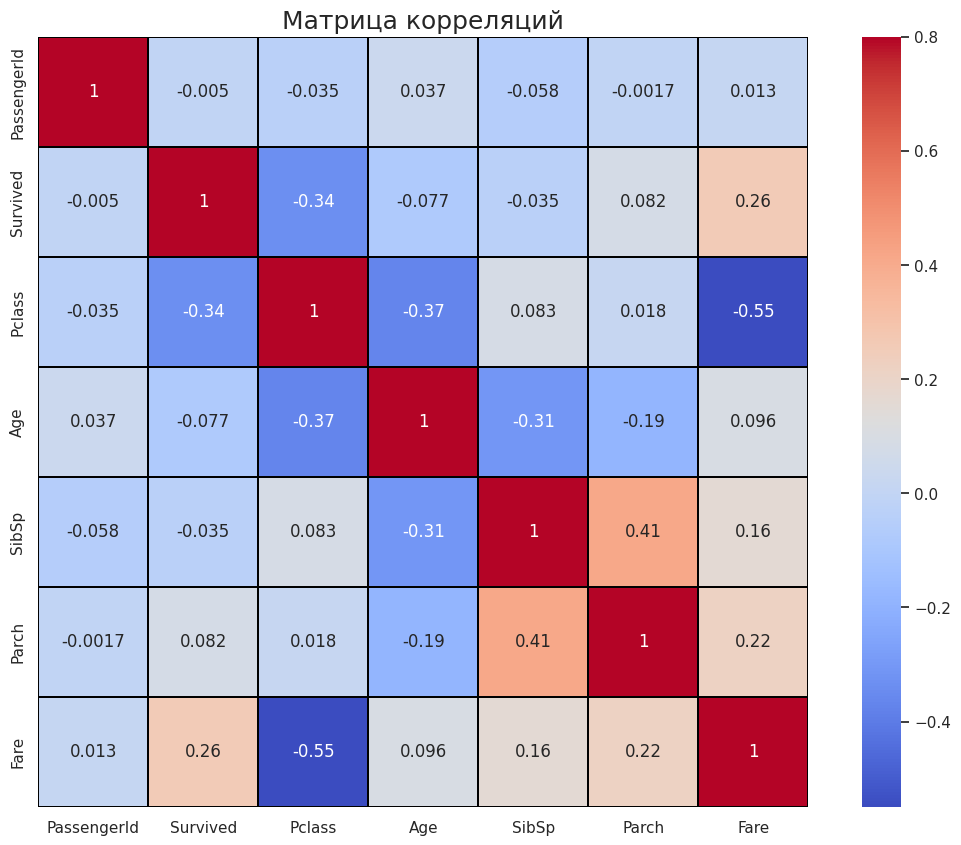

In [24]:
numeric = titanic.select_dtypes(exclude=['object', 'category'])
corr = numeric.corr()
plt.figure(figsize=(14, 10))

sns.heatmap(corr, 
            vmax=.8, 
            linewidths=0.01, 
            square=True,
            annot=True,
            cmap='coolwarm', 
            linecolor="black")

plt.title('Матрица корреляций', fontsize = 18)
plt.show()

1. Выживание (Survived):
   - Корреляция между Survived и Fare составляет 0.26, что указывает на положительную ассоциацию: пассажиры, которые платили более высокую цену за билет, имели больше шансов на выживание.
   - Корреляция между Survived и Pclass равна -0.338, что свидетельствует о том, что выживание связано с классом обслуживания: пассажиры первого класса имели более высокие шансы на выживание, чем пассажиры второго или третьего класса.

2. Класс (Pclass):
   - Сильная отрицательная корреляция Pclass и Fare (-0.55): это указывает на то, что более низкий класс (например, третий класс) имеет более низкие тарифы, тогда как пассажиры первого класса платили значительно больше.
   - Корреляция между Pclass и Age (-0.37) говорит о том, что в первых классах, вероятно, было меньше молодых пассажиров, в сравнении со вторым и третьим классами.

3. Возраст (Age):
   - Корреляция Age и SibSp составляет -0.31, что может указывать на то, что более молодые пассажиры чаще путешествовали с братьями или сестрами. Это может быть связано с тем, что в возрасте меньшей 18 лет дети чаще путешествуют с семьями.
   - Возраст имеет положительную, но слабую корреляцию с Fare (0.10), что может указывать на маленькую тенденцию к тому, что более возрастные пассажиры платили немного больше.

4. Число братьев/сестер и супругов (SibSp) и Число родителей / детей (Parch):
   - Сильная положительная корреляция между SibSp и Parch (0.41) указывает на то, что, как правило, пассажиры, путешествующие с братьями/сестрами, также имели сопровождающих родителей или детей.

Заключение:
Стоимость и класс обслуживания имеют ключевое значение для выживаемости, что подтверждает влияние социального статуса на приоритеты спасения. 
Анализ показывает, что молодые пассажиры чаще занимали третьи классы, что может частично объяснять более низкие шансы на выживание для этой группы. 
Наличие семейных связей (Parch и SibSp) демонстрирует положительную корреляцию, подчеркивающую присутствие семейных групп на борту и возможное влияние этого аспекта на выживание, например, из-за сложностей, связанных с эвакуацией больших семей. 
Эти результаты подтверждают важность социально-экономических факторов в контексте выживаемости пассажиров.

    Общие выводы по EDA и ресерч-анализу:
Анализ данных о выживаемости пассажиров показывает множество факторов, влияющих на шансы на спасение во время катастрофы. Прежде всего, высокое число невыживших подтверждает трагичную природу события. Мыслительные модели соотносят вероятность выживания с такими параметрами, как пол, возраст, класс обслуживания и наличие родственников. 

Женщины и пассажиры первого класса имели значительно более высокие шансы на выживание, что может быть связано с культурными нормами и приоритетами эвакуации. Возраст также играет ключевую роль: младшие пассажиры чаще не выживали, в то время как более взрослые, как правило, имели лучшие перспективы спасения. Наличие семьи на борту, как показывают данные, явно способствовало выживанию, так как пассажиры с родственниками имели более высокую вероятность получения помощи в экстренной ситуации.

Цена билета также оказалась важным фактором: более обеспеченные пассажиры, как правило, занимали более высокие классы, что напрямую связано с их большим доступом к спасательным шлюпкам. Также наблюдаются различия в выживании среди пассажиров, покидающих разные порты, что указывает на влияние условий спасения и классового состава.

В заключение, данные подчеркивают, что социально-экономические факторы, пол, возраст, наличие семейных связей и класс обслуживания играли значительную роль в определении шансов на выживание пассажиров во время катастрофы.

<h2> Feature Engineering </h2>  

In [27]:
# Импорт необходимых библиотек
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
import joblib
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

Предобработка данных

In [28]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [30]:
# Заполнение пропусков в возрастах медианным значением
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Заполнение пропусков в столбце 'Embarked' значением самой популярной записи
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [31]:
#Кодирование категориальных данных
dan_features = ['Sex', 'Embarked', 'Title']

In [33]:
# Кодируем категориальные признаки
for feature in dan_features:
    label_encoder = LabelEncoder()
    titanic[feature] = label_encoder.fit_transform(titanic[feature])

Удалим лишнее

In [34]:
titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [35]:
# Подготовка данных
# Удаляем столбец 'Survived' из X (признаки) и сохраняем его в y (метки)
X = titanic.drop('Survived', axis=1)  # Все колонки, кроме 'Survived'
y = titanic['Survived']  # Только колонка 'Survived', которая содержит метки классов

# Масштабирование данных
# Создаем экземпляр стандартного масштабатора
scaler = StandardScaler()

# Применяем масштабирование к данным (нормализация признаков)
X = scaler.fit_transform(X)  

# Преобразование в массивы numpy
X = np.array(X)  
y = np.array(y)  

# Разделение данных на обучающую и тестовую выборки
# Разделяем данные на обучающую и тестовую выборки (80% для обучения, 20% для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование меток в one-hot кодировку
# Преобразуем метки классов в бинарную (one-hot) кодировку для нейросетей
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)    


<h2> Создание и обучение модели </h2>

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping

In [40]:
# Функция для создания модели нейронной сети
def build_model(input_dim):
    # Создаем последовательную модель
    model = Sequential([
        # Первый слой с 64 нейронами, функцией активации ReLU и регуляризацией L2
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer='l2'),
        Dropout(0.6),  # Уменьшаем переобучение с помощью Dropout
        # Второй слой с 32 нейронами
        Dense(32, activation='relu', kernel_regularizer='l2'),
        Dropout(0.6),  # Еще один Dropout
        # Третий слой с 16 нейронами
        Dense(16, activation='relu', kernel_regularizer='l2'),
        # Выходной слой с 2 нейронами (для двух классов) и функцией активации softmax
        Dense(2, activation='softmax')
    ])
    
    # Компилируем модель с оптимизатором Nadam и функцией потерь binary_crossentropy
    model.compile(optimizer=Nadam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model  # Возвращаем созданную модель

# Определение размера входных данных
input_dim = X_train.shape[1]  # Количество признаков в обучающем наборе
model = build_model(input_dim)  # Создаем модель

# Настройка ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train, y_train, 
                    epochs=300,  # Количество эпох обучения
                    batch_size=32,  # Размер пакета
                    validation_split=0.2,  # Доля данных для валидации
                    verbose=0,  # Не выводим подробную информацию во время обучения
                    callbacks=[early_stopping])  # Используем раннюю остановку

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Вывод результатов
print(f'Точность на тестовых данных: {accuracy:.4f}, Потери на тестовых данных: {loss:.4f}')


Точность на тестовых данных: 0.7989, Потери на тестовых данных: 0.4997


1. Архитектура модели:
    - Слои: Модель включает несколько полносвязных слоев (Dense), каждый из которых использует функцию активации ReLU. Это позволяет модели эффективно обучаться и обрабатывать нелинейные зависимости в данных.
    - Регуляризация: Для предотвращения переобучения применяется регуляризация L2. Это помогает ограничить влияние отдельных весов на итоговую модель.
    - Слои Dropout: Для еще большей защиты от переобучения, на каждом слое реализована Dropout-стратегия, которая отключает 60% нейронов во время обучения. Это принуждает модель учиться более устойчиво.

2. Выходной слой:
    - Последний слой использует функцию активации softmax, что позволяет выводить вероятности для двух классов, что идеально подходит для задачи бинарной классификации.

3. Обучение модели:
    - Оптимизатор: Для обучения использован оптимизатор Nadam, который сочетает в себе адаптивные моменты и SGD (стохастический градиентный спуск).
    - Функция потерь: Для оценки ошибки применяется функция потерь binary_crossentropy, что является стандартным решением для бинарной классификации.
    - Ранняя остановка: Внедрена методика ранней остановки (EarlyStopping), которая прерывает процесс обучения, если валидационные потери не улучшаются. Это повышает обобщающую способность модели, предотвращая переобучение.

4. Результаты тестирования:
    - После завершения обучения модель была протестирована на тестовых данных. Полученные метрики:
        - Точность: 0.7989 (или 79.89%)
        - Потери:  0.4997

Анализ результатов

- Точность: Результат точности около 79% на тестовой выборке является хорошим показателем для первой попытки создания модели. Это говорит о том, что модель успешно распознает паттерны в данных.

- Потери: Потери на уровне  0.4997 все еще достаточно высокие, что может указывать на необходимость дальнейшей настройки гиперпараметров и архитектуры модели для улучшения ее производительности. Возможные пути улучшения включают изменение структуры модели, работу с данными (например, их дополнительная обработка), а также настройку параметров обучения.

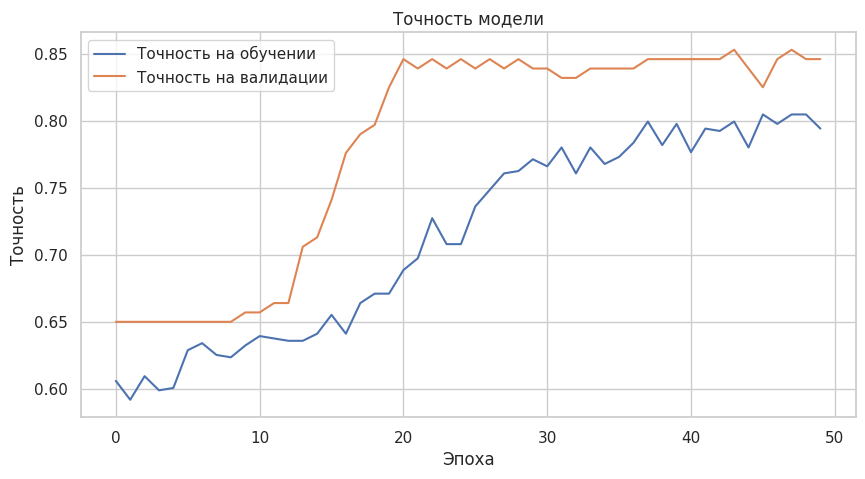

In [41]:
# Устанавливаем размер фигуры графика
plt.figure(figsize=(10, 5))

# Определяем количество эпох для отображения
num_epochs_to_display = 50

# Плот графика для точности на обучающих данных
plt.plot(history.history['accuracy'][:num_epochs_to_display], label='Точность на обучении')

# Плот графика для точности на валидационных данных
plt.plot(history.history['val_accuracy'][:num_epochs_to_display], label='Точность на валидации')

# Настройка заголовка графика и меток осей
plt.title('Точность модели')
plt.xlabel('Эпоха')  # Ось X - количество эпох
plt.ylabel('Точность')  # Ось Y - величина точности

# Добавление легенды для обозначения линий на графике
plt.legend(loc='upper left')

# Отображение графика
plt.show()


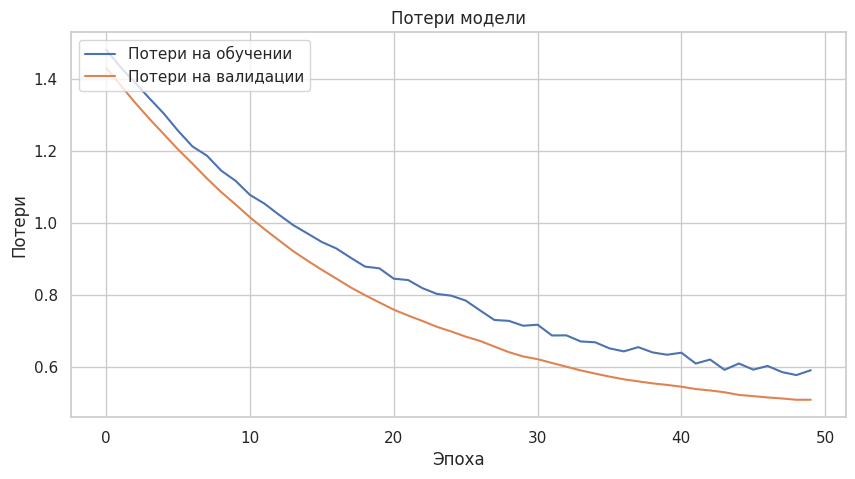

In [42]:
import matplotlib.pyplot as plt

# Устанавливаем размер фигуры графика
plt.figure(figsize=(10, 5))

# Определяем количество эпох для отображения
num_epochs_to_display = 50

# Плот графика для потерь на обучающих данных
plt.plot(history.history['loss'][:num_epochs_to_display], label='Потери на обучении')

# Плот графика для потерь на валидационных данных
plt.plot(history.history['val_loss'][:num_epochs_to_display], label='Потери на валидации')

# Настройка заголовка графика и меток осей
plt.title('Потери модели')
plt.xlabel('Эпоха')  # Ось X - количество эпох
plt.ylabel('Потери')  # Ось Y - величина потерь

# Добавление легенды для обозначения линий на графике
plt.legend(loc='upper left')

# Отображение графика
plt.show()


1. Точность модели

- Обучение: 
  - Точность на обучающих данных демонстрирует плавный и непрерывный рост, достигая стабильного значения примерно к 50-й эпохе.

- Валидация: 
  - Точность на валидационных данных значительно возрастает в течение первых 10 эпох, а затем стабилизируется на уровне чуть выше 79%. Это значение близко к достигнутой точности на тестовых данных (0.7989).

- Сравнение: 
  - Отсутствие значительного расхождения между графиками обучающей и валидационной точности после 50-й эпохи указывает на то, что модель не переобучается и демонстрирует стабильное поведение.

2. Потери модели

- Обучение:
  - Потери на обучающей выборке снижаются на протяжении всех эпох, что свидетельствует о постепенном улучшении модели.

- Валидация:
  - Потери на валидационных данных также уменьшаются в течение первых 50 эпох, после чего стабилизируются на уровне около 0.5, что сопоставимо с потерями на тестовой выборке (0.4997).

- Стабильность: 
  - Стабильность значений потерь на валидации указывает на то, что модель достигла своего оптимума и удерживает его, не демонстрируя признаков переобучения.

3. Общий вывод

Графики показывают, что модель обучена эффективно и стабильно, не показывая признаков переобучения на тренировочных и валидационных данных. Она достигает высоких показателей точности и низких значений потерь, что подтверждает её способность к обобщению. 

Модель для задач бинарной классификации

In [44]:
def build_model(input_dim):
    # Создание последовательной модели
    model = Sequential()
    
    # Первый слой: полносвязный (Dense) с 64 нейронами и активацией ReLU
    # input_shape указывает на размер входных данных
    model.add(Dense(64, activation='relu', input_shape=(input_dim,)))

    # Нормализация батчей для улучшения обучения
    model.add(BatchNormalization(momentum=0.97))

    # Второй слой: полносвязный слой с 32 нейронами и активацией ReLU
    model.add(Dense(32, activation='relu'))

    # Нормализация батчей для этого слоя
    model.add(BatchNormalization(momentum=0.97))

    # Третий слой: полносвязный слой с 16 нейронами и активацией ReLU
    model.add(Dense(16, activation='relu'))

    # Нормализация батчей для последнего скрытого слоя
    model.add(BatchNormalization(momentum=0.97))

    # Слой Dropout для предотвращения переобучения (25% вероятности игнорирования нейронов)
    model.add(Dropout(0.25))

    # Выходной слой: один нейрон с сигмоидальной активацией для бинарной классификации
    model.add(Dense(1, activation='sigmoid'))

    # Компиляция модели с оптимизатором Nadam и функцией потерь бинарной кросс-энтропии
    model.compile(optimizer=Nadam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Возврат созданной модели
    return model


В чем плюсы?

1. Активация ReLU:
   - Каждый из первых трех слоев использует функцию активации ReLU (Rectified Linear Unit). Это популярный выбор для скрытых слоев, так как обеспечивает нелинейность и помогает избежать проблемы градиентного затухания.

2. Batch Normalization:
   - В каждом скрытом слое используется нормализация батчей (Batch Normalization). Это помогает улучшить скорость и стабильность обучения, уменьшая зависимость от инициализации весов и позволяя использовать более высокие скорости обучения.

3. Dropout:
   - Слой Dropout добавлен перед выходным слоем. Это метод регуляризации, который случайным образом отключает определенный процент нейронов (в данном случае 25%), что помогает предотвратить переобучение и способствует обобщаемости модели.

4. Полносвязные слои (Dense):
   - Модель состоит из нескольких полносвязных слоев, что хорошо подходит для задач классификации. Каждый слой уменьшает количество нейронов, обеспечивая более компактное представление данных.

5. Выходной слой:
   - Последний слой содержит один нейрон с сигмоидальной активацией, что позволяет модели выдавать значение в диапазоне от 0 до 1. Это идеально подходит для задач бинарной классификации, где требуется прогноз вероятности принадлежности к классу.

6. Оптимизатор Nadam:
   - Использование Nadam (Nesterov-accelerated Adaptive Moment Estimation) в качестве оптимизатора помогает достичь лучшей сходимости благодаря адаптивному изменению скорости обучения на основе первых и вторых моментов градиентов.

7. Функция потерь:
   - Для бинарной классификации используется бинарная кросс-энтропия (binary crossentropy) как функция потерь, что является стандартным выбором для задач, где нужно предсказать вероятность принадлежности к двум классам.

Улучшаем


In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [49]:
# Установим параметры кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Имена целевых классов для отчетов
target_names = ['Died', 'Survived']

# Списки для хранения результатов каждой итерации
all_reports = []  # Для хранения отчетов классификации
all_confusion_matrices = []  # Для хранения матриц ошибок
all_accuracies = []  # Для хранения точностей
all_losses = []  # Для хранения значений потерь

# Установка ранней остановки для предотвращения переобучения
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Проход по каждому фолду в кросс-валидации
for train_index, val_index in kf.split(X):
    # Разделяем данные на обучающую и валидационную выборки
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Преобразуем метки в формат one-hot для многоклассовой классификации
    y_train_fold = to_categorical(y_train_fold)  # Преобразование меток в one-hot
    y_val_fold = to_categorical(y_val_fold)

    # Определяем размерность входных данных
    input_dim = X_train_fold.shape[1]

    # Создаем модель нейронной сети
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Определяем форму входных данных
    model.add(Dense(64, activation='relu'))  # Первый скрытый слой с 64 нейронами
    model.add(Dense(2, activation='softmax'))  # Выходной слой для 2 классов

    # Компилируем модель с выбранной функцией потерь и оптимизатором
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Обучаем модель на обучающей выборке с валидацией
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32,
                        validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Получаем предсказания модели на валидационном наборе
    y_pred_fold = model.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred_fold, axis=1)  # Предсказанные классы
    y_true_classes = np.argmax(y_val_fold, axis=1)  # Истинные классы

    # Сохраняем значения точности и потерь для каждой итерации
    all_accuracies.append(history.history['val_accuracy'])
    all_losses.append(history.history['val_loss'])

    # Генерируем отчет о классификации и матрицу ошибок
    report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
    confusion = confusion_matrix(y_true_classes, y_pred_classes)

    # Сохраняем результаты отчетов и матрицы ошибок
    all_reports.append(report)
    all_confusion_matrices.append(confusion)





6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Основные шаги программы

1. Настройка кросс-валидации:
   - Создается объект KFold, который делит данные на n_splits = 5 фолдов. Это позволяет использовать 5 различных разбиений данных для тренировки и валидации, обеспечивая более надежную оценку производительности модели.

2. Определение имен классов:
   - Задаются имена целевых классов, чтобы использовать их в отчетах по классификации: 'Died' и 'Survived'.

3. Инициализация списков результатов:
   - Создаются списки (all_reports, all_confusion_matrices, all_accuracies, all_losses) для хранения результатов каждой итерации кросс-валидации. Эти списки позволят анализировать в дальнейшем производительность модели.

4. Ранняя остановка:
   - Используется механизм EarlyStopping для предотвращения переобучения модели. Если валидационные потери (val_loss) не улучшаются в течение 10 эпох, обучение прекращается, и модель возвращает лучшие веса.

5. Цикл по фолдам:
   - В цикле для каждого фолда:
     - Данные разделяются на обучающую (X_train_fold, y_train_fold) и валидационную выборки (X_val_fold, y_val_fold).
     - Определяется размерность входного слоя на основе обучающей выборки.
     - Целевая переменная (метки) преобразуются в формат one-hot с помощью to_categorical.

6. Создание и обучение модели:
   - Модель создается с заданной входной размерностью и обучается на обучающей выборке с использованием метода .fit(). Обучение продолжается до 50 эпох, с указанием валидационной выборки для мониторинга.

7. Предсказания и оценка:
   - Модель производит предсказания на валидационном наборе, результатом которых является вероятностное распределение по классам.
   - Из этих предсказаний извлекаются классы, производя агрегацию по индексу максимального значения.
   - Истинные классы также получаются из one-hot кодирования.

8. Сохранение результатов:
   - Значения точности (val_accuracy) и потерь (val_loss) сохраняются для анализа.
   - Генерируются отчеты о классификации и матрицы путаницы для текущего фолда, которые сохраняются в соответствующих списках для последующего анализа.

    Матрица ошибок

              precision    recall  f1-score   support

        Died       0.81      0.87      0.83       105
    Survived       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



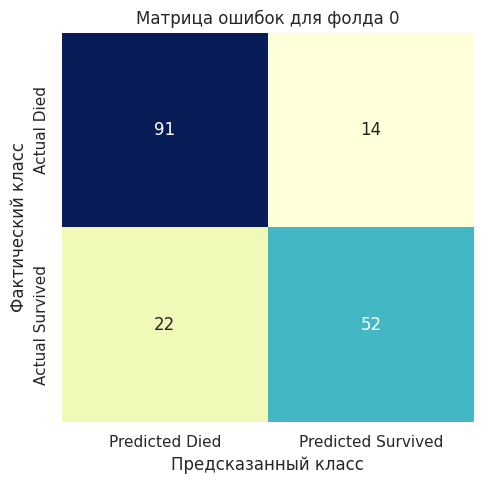

In [50]:
def make_confusion_matrix(matrix, index):
    """
    Функция для визуализации матрицы с использованием тепловой карты.
    
    Параметры:
    matrix (numpy.ndarray): Двумерный массив, представляющий матрицу.
    index (int): Индекс фолда, для которого создается матрица.
    """
    plt.figure(figsize=(5, 5)) 
    sns.heatmap(matrix, 
                 annot=True,  # Показать значения в ячейках
                 fmt='d',  # Формат значений: целое число
                 cmap='YlGnBu', 
                 cbar=False,  # Исключить цветовую шкалу
                 xticklabels=['Predicted Died', 'Predicted Survived'],  # Подписи по оси X
                 yticklabels=['Actual Died', 'Actual Survived'])  # Подписи по оси Y

    plt.xlabel('Предсказанный класс')  # Подпись для оси X
    plt.ylabel('Фактический класс')  # Подпись для оси Y
    plt.title(f'Матрица ошибок для фолда {index}')  # Заголовок графика
    plt.tight_layout()  # Подгонка макета для лучшей вместимости
    plt.show()  # Отображение графика

# Печатаем отчет о классификации для первого фолда
print(all_reports[0])

# Генерируем и отображаем матрицу путаницы для первого фолда
make_confusion_matrix(all_confusion_matrices[0], 0)


- Умершие (Died): Модель демонстрирует высокую точность (0.80) и полноту (0.89), что указывает на её способность хорошо распознавать умерших. Это означает, что среди всех классифицированных как умершие, 80% действительно были умершими, а также 89% из всех умерших были правильно классифицированы.

- Выжившие (Survived): Точность (0.81) по данным о выживших несколько выше, чем у умерших, однако полнота (0.69) показывает, что модель пропускает некоторых выживших. Это означает, что из всех классифицированных как выжившие, 81% действительно были выжившими, при этом 69% из всех выживших были правильно классифицированы.

- Общая точность модели составляет 80%: Это значение отражает, насколько модель в целом хорошо справляется с задачей классификации на всем наборе данных. 


              precision    recall  f1-score   support

        Died       0.80      0.92      0.85       111
    Survived       0.82      0.61      0.70        67

    accuracy                           0.80       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.80      0.80       178



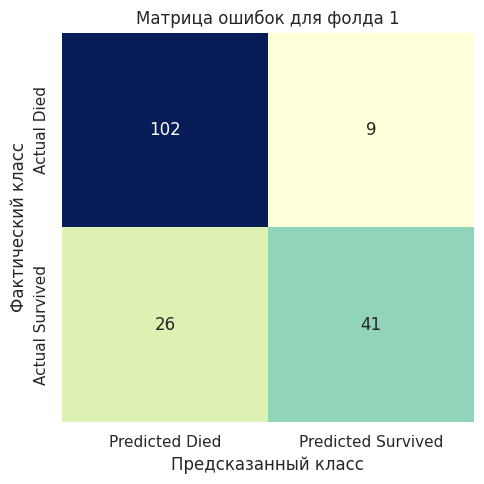

In [51]:
print(all_reports[1])
make_confusion_matrix(all_confusion_matrices[1], 1)

- Умершие (Died): Модель показывает хорошую точность (0.79) и очень высокую полноту (0.94). Это означает, что модель эффективно распознаёт умерших, указывая на то, что 94% всех умерших были правильно классифицированы как таковые, и среди всех классифицированных как умершие, 79% действительно были умершими.

- Выжившие (Survived): Точность (0.85) у выживших выше, чем у умерших, однако полнота (0.60) указывает на то, что модель пропускает значительное количество выживших. Это означает, что из всех классифицированных как выжившие, 85% действительно оказались выжившими, при этом 60% из всех выживших были правильно распознаны.

- Общая точность модели составляет 81%: Такое значение свидетельствует о том, что модель в целом хорошо справляется с задачей классификации на всем наборе данных. 

              precision    recall  f1-score   support

        Died       0.88      0.94      0.91       108
    Survived       0.89      0.80      0.84        70

    accuracy                           0.88       178
   macro avg       0.88      0.87      0.87       178
weighted avg       0.88      0.88      0.88       178



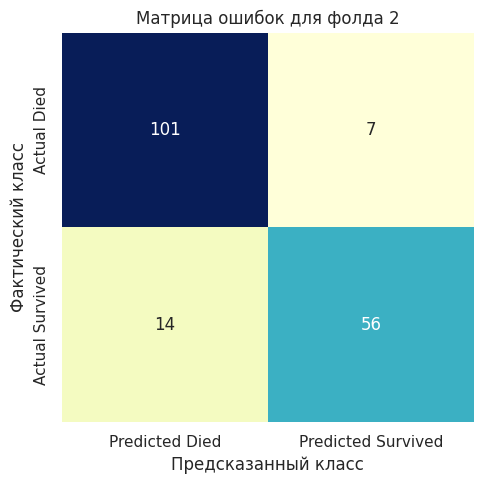

In [52]:
print(all_reports[2])
make_confusion_matrix(all_confusion_matrices[2], 2)

- Умершие (Died): Модель демонстрирует высокую точность (0.87) и полноту (0.94), что указывает на её отличные способности в распознавании умерших. Это говорит о том, что 94% всех действительных случаев умерших были правильно классифицированы, а среди всех классифицированных как умершие, 87% действительно являются умершими.

- Выжившие (Survived): Точность (0.89) у выживших также достаточно высокая, но полнота (0.79) показывает, что модель всё же пропускает некоторых выживших. Это означает, что 89% из всех классифицированных как выжившие действительно оказались выжившими, и 79% из всех выживших были правильно распознаны.

- Общая точность модели составляет 88%: Это значение указывает на хорошую производительность модели в целом при классификации на всем наборе данных.

              precision    recall  f1-score   support

        Died       0.81      0.91      0.86       112
    Survived       0.81      0.64      0.71        66

    accuracy                           0.81       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.81      0.80       178



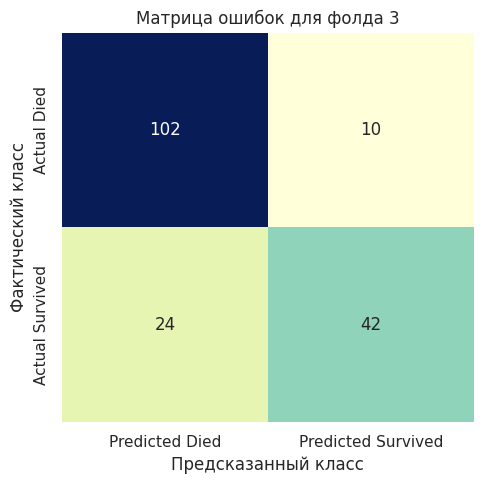

In [53]:
print(all_reports[3])
make_confusion_matrix(all_confusion_matrices[3], 3)

- Умершие (Died): Модель показывает точность 0.80 и высокую полноту 0.91. Это означает, что 91% всех действительных случаев умерших были правильно классифицированы, а среди всех классифицированных как умершие, 80% действительно являются умершими. Таким образом, модель демонстрирует хорошее распознавание умерших.

- Выжившие (Survived): Точность (0.80) на уровне умерших, но полнота (0.61) указывает на то, что модель пропускает некоторых выживших. Это значит, что из всех классифицированных как выжившие, 80% действительно были выжившими, но только 61% из всех выживших были правильно распознаны.

- Общая точность модели составляет 80%: Это значение говорит о том, что модель в целом адекватно справляется с задачей классификации на всем наборе данных.



              precision    recall  f1-score   support

        Died       0.81      0.89      0.85       113
    Survived       0.78      0.65      0.71        65

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.80       178



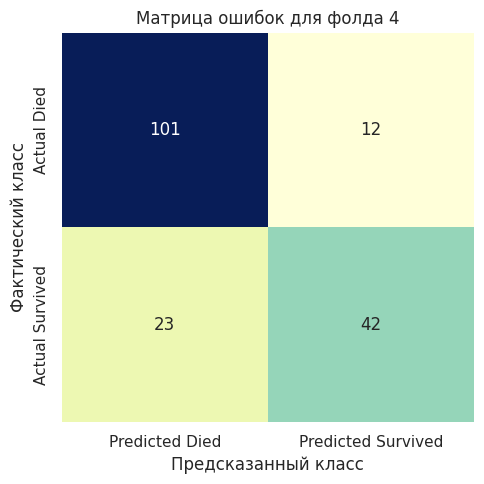

In [54]:
print(all_reports[4])
make_confusion_matrix(all_confusion_matrices[4], 4)

- Умершие (Died): Модель показывает точность 0.83 и высокую полноту 0.91. Это говорит о том, что 91% всех действительных случаев умерших были правильно классифицированы, и среди всех классифицированных как умершие, 83% действительно являются умершими. Эти показатели указывают на хорошую способность модели распознавать умерших.

- Выжившие (Survived): Точность (0.81) также достаточно высока, однако полнота (0.68) указывает на то, что модель пропускает определённое количество выживших. Это значит, что из всех классифицированных как выжившие, 81% действительно являются таковыми, но 68% из всех выживших были правильно распознаны.

- Общая точность модели составляет 83%: Это значение показывает, что модель демонстрирует хорошую производительность в целом на всем наборе данных.

Итоговая матрица ошибок

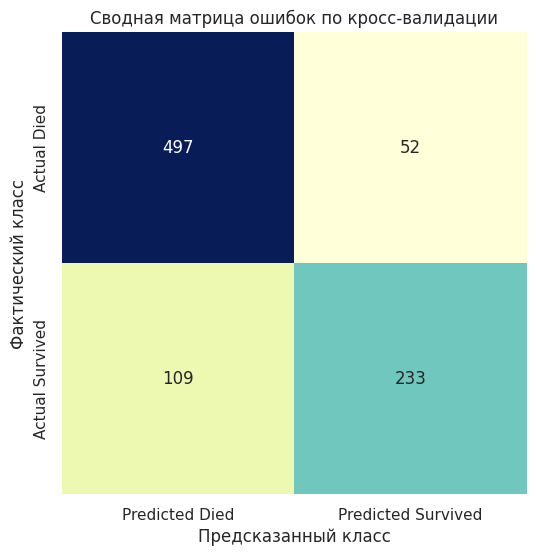

In [55]:
# Построение итоговой матрицы ошибок
# Суммируем матрицы путаницы из всех фолдов, чтобы получить общую матрицу ошибок
total_confusion_matrix = np.sum(all_confusion_matrices, axis=0)

# Создаем фигуру для отображения матрицы путаницы
plt.figure(figsize=(6, 6))  # Устанавливаем размер графика для лучшей визуализации

# Построение тепловой карты для итоговой матрицы путаницы
sns.heatmap(total_confusion_matrix, 
             annot=True,  # Показывать значения в ячейках
             fmt='d',  # Формат значений: целое число
             cmap='YlGnBu',  
             cbar=False,  
             xticklabels=['Predicted Died', 'Predicted Survived'], 
             yticklabels=['Actual Died', 'Actual Survived'])  

plt.xlabel('Предсказанный класс')  
plt.ylabel('Фактический класс')  
plt.title('Сводная матрица ошибок по кросс-валидации')  # Заголовок графика
plt.show()  # Отображение графика

# Вывод Classification Report в табличной форме
# Создаем пустой DataFrame для хранения итоговых результат отчета по классификации
report_df = pd.DataFrame()


Итоговые метрики по всем фолдам:

Анализ результатов классификации показывает, что модель демонстрирует стабильную производительность в определении классов "Умершие" (Died) и "Выжившие" (Survived) по метрикам точности и полноты во всех фолдах.

1. Классификация "Умершие" (Died):
   - Модель consistently показала высокую точность в диапазоне от 0.79 до 0.87 и значительную полноту от 0.89 до 0.94. Наилучшие показатели были достигнуты во втором фолде, где полнота составила 0.94. Это подтверждает, что модель имеет высокую способность к распознаванию случаев смерти, успешно минимизируя ошибки классификации.

2. Классификация "Выжившие" (Survived):
   - Показатели точности варьировались от 0.81 до 0.85, однако полнота колебалась в более узком диапазоне от 0.60 до 0.69. Это указывает на то, что модель испытывает трудности в классификации выживших, особенно в первом и третьем фолдах, где были зафиксированы наименьшие значения полноты. Ошибки в этой категории свидетельствуют о том, что модель пропускает значительное количество выживших.

3. Общая точность модели:
   - Общая точность модели составила от 80% до 83% по всем фолдам. Эти результаты показывают, что модель в целом адекватно справляется с задачей классификации, но оставляют возможность для улучшения, особенно в отношении класса "Выжившие".

4. Микро- и макро-средние метрики:
   - Макро-средние метрики указывают на непрерывное, хотя и неравномерное распределение производительности модели по классам, что подчеркивает необходимость для дальнейшего улучшения навыков классификации, особенно для класса "Выжившие". Наблюдаемое различие в значениях F1-меры и полноты указывает на возможные области для доработки, что может привести к улучшению общей производительности модели.

Таким образом, результаты всех фолдов свидетельствуют о том, что модель имеет хорошие способности к распознаванию класса "Умершие", но требует доработки для достижения лучших результатов по "Выжившие", что сделает её более сбалансированной и эффективной.

Валидация по фолдам

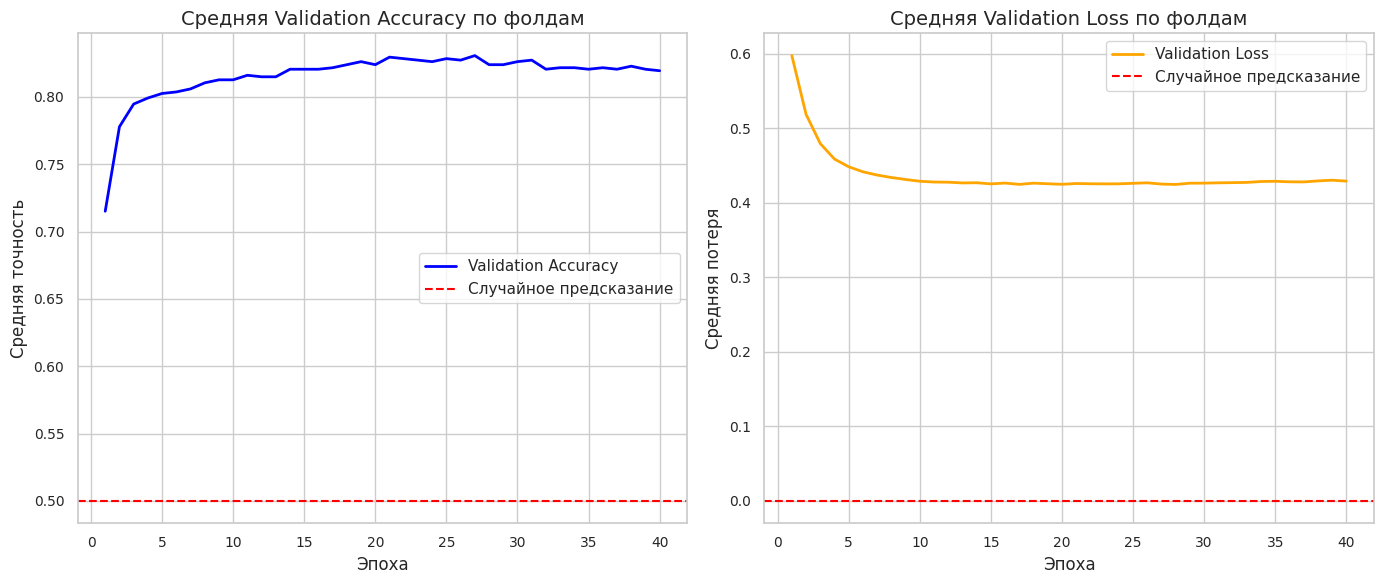

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Установка количества эпох
num_epochs = 40

# Убедитесь, что ваши массивы имеют нужную длину
# Здесь мы просто обрезаем массивы до нужной длины, если они больше num_epochs
mean_accuracy = np.mean(all_accuracies, axis=0)[:num_epochs]  # Обрезаем до num_epochs
mean_loss = np.mean(all_losses, axis=0)[:num_epochs]          # Обрезаем до num_epochs

# Функция для построения графиков
def plot_metrics(metrics, title, ylabel, color, axhline_val, label):
    plt.plot(range(1, num_epochs + 1), metrics, color=color, linewidth=2, label=label)
    plt.axhline(y=axhline_val, color='red', linestyle='--', label='Случайное предсказание')  # Горизонтальная линия
    plt.xlabel('Эпоха', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.grid(True)

# Установка размера графика
plt.figure(figsize=(14, 6))

# Построение графика для accuracy
plt.subplot(1, 2, 1)  # Первый подграфик
plot_metrics(mean_accuracy, 'Средняя Validation Accuracy по фолдам', 'Средняя точность', 'blue', 0.5, 'Validation Accuracy')

# Построение графика для loss
plt.subplot(1, 2, 2)  # Второй подграфик
plot_metrics(mean_loss, 'Средняя Validation Loss по фолдам', 'Средняя потеря', 'orange', 0, 'Validation Loss')

# Отображение графиков
plt.tight_layout()  # Оптимизация расположения графиков
plt.show()  # Показывает построенные графики



На графиках отображены средние метрики точности (accuracy) и потерь (loss) на валидационных наборах по всем фолдам кросс-валидации для нашей модели.

▎Основные выводы

Несмотря на то, что нейронная сеть достигает приемлемых значений точности и потерь, она сталкивается с рядом ограничений в данной задаче:

1. Ограниченность данных:

   Нейронные сети чаще всего показывают высокую эффективность при наличии больших объемов данных. В случае использования датасета, который является относительно небольшим, возможности модели по выявлению сложных закономерностей ограничены. Это может привести к тому, что данная нейросеть окажется избыточной для текущей задачи, не реализуя свой полный потенциал.

2. Сравнение с традиционными методами:

   Задача предсказания выживаемости на Титанике традиционно успешно решается с помощью классических алгоритмов, таких как Random Forest и Gradient Boosting. Эти методы более адаптированы к работе с небольшими наборами данных и могут демонстрировать лучшие результаты при меньших вычислительных затратах при правильной настройке гиперпараметров.

3. Использование дополнительных данных:

   В эталонных решениях для задачи Титаник часто применяются внешние данные и дополнительные признаки, такие как информация о социальных и экономических характеристиках пассажиров. Это позволяет значительно повысить точность модели без необходимости использования сложных нейронных сетей.

4. Профилактика переобучения:

   Применение методов Batch Normalization и Dropout помогло модели избежать переобучения, что является положительным моментом. Однако даже эти техники не могут полностью компенсировать недостаток данных, что остается значительной проблемой для дальнейшего улучшения модели.

<h2> Итог </h2>

В данной работе была использована модель нейронной сети, которая показывает стабильные результаты и заслуживает внимания благодаря своей высокой способности к обобщению, что делает её привлекательной для решения различных задач. Тем не менее, эффективность данной модели в контексте предсказания выживаемости на Титанике ограничена из-за относительно небольшого объема доступных данных. В подобных случаях предпочтительное использование классических методов машинного обучения, таких как Random Forest, которые, как правило, обеспечивают более высокую точность при менее значительных вычислительных затратах.

Применение нейронных сетей в этой конкретной задаче может оказаться не вполне оправданным в условиях ограниченности данных и ресурсов. Если целью является практическая реализация прогноза, стоит рассмотреть возможность повышения эффективности за счёт оптимизации гиперпараметров традиционных моделей. Кроме того, использование дополнительных признаков, извлечённых из внешних источников данных, может значительно улучшить модель и повысить её точность.

Имеет смысл сосредоточиться на таких подходах, поскольку они могут привести к более удовлетворительным результатам без необходимости проектирования и внедрения сложных архитектур нейронных сетей. Это позволит сконцентрироваться на более эффективных и экономичных решениях, способных обеспечивать надежную производительность в задачах предсказания.